In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
stock='AAPL'
start_date='2012-12-31'
end_date='2021-12-31'
stock_data=yf.download(stock,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
import pandas as pd
stock_data_df=pd.DataFrame(stock_data)

In [ ]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,18.233213,19.121429,18.178572,19.006071,16.275547,659492400
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791185,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579241,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117432,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022623,484156400
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.518234,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.527771,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.498154,79144300


In [ ]:
stock_data_closed=pd.DataFrame(stock_data,columns=['Close']).reset_index()

In [ ]:
stock_data_closed

,Date,Close
0,2012-12-31,19.006071
1,2013-01-02,19.608213
2,2013-01-03,19.360714
3,2013-01-04,18.821428
4,2013-01-07,18.710714
...,...,...
2262,2021-12-23,176.279999
2263,2021-12-27,180.330002
2264,2021-12-28,179.289993
2265,2021-12-29,179.380005


In [ ]:
def create_target_data_forward(column_name,new_name,step):
    target_data=list(stock_data_closed[column_name][step:])+[0]*step
    stock_data_closed[new_name]=target_data
    stock_data_closed

In [ ]:
def create_target_data_backward(column_name,new_name,step):
  target_data=[0]*step+list(stock_data_closed[column_name][:-step])
  stock_data_closed[new_name]=target_data
  stock_data_closed

In [ ]:
create_target_data_backward('Close','previous_day1',1)
create_target_data_backward('Close','previous_day2',2)
create_target_data_backward('Close','previous_day3',3)
create_target_data_backward('Close','previous_day4',4)
create_target_data_forward('Close','day5',5)
create_target_data_forward('Close','day10',10)
create_target_data_forward('Close','day15',15)
create_target_data_forward('Close','day20',20)
stock_data_closed.rename(columns={'Close':'today'},inplace=True)
stock_data_closed

In [ ]:
stock_data_closed.drop([0,1,2,3,2267-1,2267-2,2267-3,2267-4],inplace=True)
stock_data_closed

,Date,today,previous_day1,previous_day2,previous_day3,previous_day4,next_day1,next_day2,next_day3,next_day4
4,2013-01-07,18.710714,18.821428,19.360714,19.608213,19.006071,18.761070,18.467857,18.696787,18.582144
5,2013-01-08,18.761070,18.710714,18.821428,19.360714,19.608213,18.467857,18.696787,18.582144,17.919643
6,2013-01-09,18.467857,18.761070,18.710714,18.821428,19.360714,18.696787,18.582144,17.919643,17.354286
7,2013-01-10,18.696787,18.467857,18.761070,18.710714,18.821428,18.582144,17.919643,17.354286,18.074642
8,2013-01-11,18.582144,18.696787,18.467857,18.761070,18.710714,17.919643,17.354286,18.074642,17.952856
...,...,...,...,...,...,...,...,...,...,...
2258,2021-12-17,171.139999,172.259995,179.300003,174.330002,175.740005,169.750000,172.990005,175.639999,176.279999
2259,2021-12-20,169.750000,171.139999,172.259995,179.300003,174.330002,172.990005,175.639999,176.279999,180.330002
2260,2021-12-21,172.990005,169.750000,171.139999,172.259995,179.300003,175.639999,176.279999,180.330002,179.289993
2261,2021-12-22,175.639999,172.990005,169.750000,171.139999,172.259995,176.279999,180.330002,179.289993,179.380005


In [ ]:
stock_data_closed.reset_index(inplace=True)

In [ ]:
stock_data_closed.drop('index',axis=1,inplace=True)

In [ ]:
stock_data_closed.columns

Index(['Date', 'today', 'previous_day1', 'previous_day2', 'previous_day3',
       'previous_day4', 'next_day1', 'next_day2', 'next_day3', 'next_day4'],
      dtype='object')

In [ ]:
stock_data_closed_df=pd.DataFrame(stock_data_closed,columns=['Date', 'previous_day4', 'previous_day3', 'previous_day2',
       'previous_day1','today','next_day1', 'next_day2', 'next_day3', 'next_day4'] )
stock_data_closed_df

,Date,previous_day4,previous_day3,previous_day2,previous_day1,today,next_day1,next_day2,next_day3,next_day4
0,2013-01-07,19.006071,19.608213,19.360714,18.821428,18.710714,18.761070,18.467857,18.696787,18.582144
1,2013-01-08,19.608213,19.360714,18.821428,18.710714,18.761070,18.467857,18.696787,18.582144,17.919643
2,2013-01-09,19.360714,18.821428,18.710714,18.761070,18.467857,18.696787,18.582144,17.919643,17.354286
3,2013-01-10,18.821428,18.710714,18.761070,18.467857,18.696787,18.582144,17.919643,17.354286,18.074642
4,2013-01-11,18.710714,18.761070,18.467857,18.696787,18.582144,17.919643,17.354286,18.074642,17.952856
...,...,...,...,...,...,...,...,...,...,...
2254,2021-12-17,175.740005,174.330002,179.300003,172.259995,171.139999,169.750000,172.990005,175.639999,176.279999
2255,2021-12-20,174.330002,179.300003,172.259995,171.139999,169.750000,172.990005,175.639999,176.279999,180.330002
2256,2021-12-21,179.300003,172.259995,171.139999,169.750000,172.990005,175.639999,176.279999,180.330002,179.289993
2257,2021-12-22,172.259995,171.139999,169.750000,172.990005,175.639999,176.279999,180.330002,179.289993,179.380005


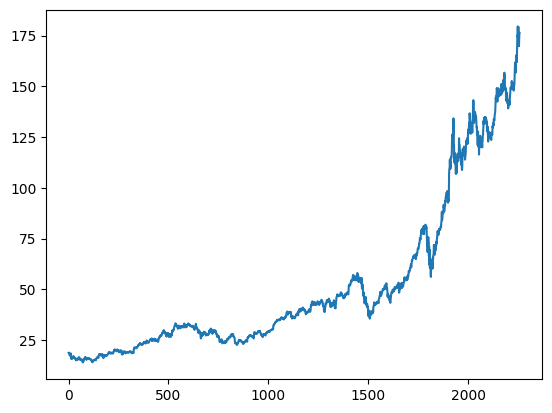

In [ ]:
import matplotlib.pyplot as plt
plt.plot(stock_data_closed['today'])

In [ ]:
input_df=pd.DataFrame(stock_data_closed,columns=['previous_day4', 'previous_day3', 'previous_day2',
       'previous_day1','today'] )
target_df=pd.DataFrame(stock_data_closed,columns=['next_day1', 'next_day2', 'next_day3', 'next_day4'] )
target_df_values=target_df.values

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
stock_df=stock_data_closed
input_scaled_df=scaler.fit_transform(input_df)
input_scaled_df

array([[0.03056492, 0.03420319, 0.03270775, 0.02944927, 0.02878032],
       [0.03420319, 0.03270775, 0.02944927, 0.02878032, 0.02908458],
       [0.03270775, 0.02944927, 0.02878032, 0.02908458, 0.02731292],
       ...,
       [0.99909371, 0.95655653, 0.94978929, 0.94139063, 0.96096741],
       [0.95655653, 0.94978929, 0.94139063, 0.96096741, 0.97697921],
       [0.94978929, 0.94139063, 0.96096741, 0.97697921, 0.98084622]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_scaled_df,target_df_values, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,y_train.shape

(5, (1807, 4))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
n, t = X_train.shape[0],X_train.shape[1]
X_train_reshaped = X_train.reshape(n, t, 1)

n, t = X_test.shape[0],X_test.shape[0]
X_test_reshaped = X_test.reshape(n, t, 1)

In [ ]:
model = Sequential()
model.add(LSTM(units=64, input_shape=()))
model.add(Dense(4))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train_reshaped, y_train, epochs=180, batch_size=20, verbose=1)

Epoch 1/180
91/91 [==============================] - 0s 3ms/step - loss: 101.2609
Epoch 2/180
91/91 [==============================] - 0s 3ms/step - loss: 90.3659
Epoch 3/180
91/91 [==============================] - 0s 3ms/step - loss: 80.9853
Epoch 4/180
91/91 [==============================] - 0s 4ms/step - loss: 73.0215
Epoch 5/180
91/91 [==============================] - 0s 4ms/step - loss: 66.9215
Epoch 6/180
91/91 [==============================] - 0s 3ms/step - loss: 60.3115
Epoch 7/180
91/91 [==============================] - 0s 3ms/step - loss: 55.6697
Epoch 8/180
91/91 [==============================] - 0s 4ms/step - loss: 50.5733
Epoch 9/180
91/91 [==============================] - 0s 4ms/step - loss: 46.6596
Epoch 10/180
91/91 [==============================] - 0s 3ms/step - loss: 42.1890
Epoch 11/180
91/91 [==============================] - 0s 3ms/step - loss: 38.4911
Epoch 12/180
91/91 [==============================] - 0s 4ms/step - loss: 36.1873
Epoch 13/180
91/91 [====

In [ ]:
mse = model.evaluate(X_test_reshaped, y_test)
print(f"Mean Squared Error on Test Data: {mse:.2f}")
predictions = model.predict(X_test_reshaped)
predictions

15/15 [==============================] - 0s 6ms/step - loss: 6.5799
Mean Squared Error on Test Data: 6.58
15/15 [==============================] - 0s 3ms/step


array([[ 49.299667,  49.277016,  49.373047,  49.42275 ],
       [ 23.53514 ,  23.599213,  23.62714 ,  23.607182],
       [ 30.23758 ,  30.292383,  30.316792,  30.317894],
       ...,
       [132.76553 , 132.68724 , 132.743   , 132.67043 ],
       [ 19.335983,  19.279829,  19.332594,  19.30197 ],
       [132.62277 , 132.54396 , 132.60042 , 132.52628 ]], dtype=float32)

In [ ]:
y_test

array([[ 49.875     ,  50.15499878,  49.73749924,  49.71749878],
       [ 22.59000015,  22.72500038,  22.99500084,  23.23250008],
       [ 31.61499977,  31.77000046,  31.95750046,  32.18000031],
       ...,
       [128.1000061 , 129.74000549, 130.21000671, 126.84999847],
       [ 18.69571495,  18.55750084,  18.63142967,  18.4985714 ],
       [134.38999939, 133.58000183, 133.47999573, 131.46000671]])

In [ ]:
def predict_values(input):
    input_data=scaler.transform(np.asarray(input).reshape(1,-1))
    input_data = np.array([[input]])
    input_data_reshaped = input_data.reshape(1, 5, 1)
    predictions = model.predict(input_data_reshaped)
    predictions= predictions.flatten().tolist()
    print(f"predictions for next 4 days are :\n Day 1: ${predictions[0]:.2f}\n Day 2: ${predictions[1]:.2f}\n Day 3: ${predictions[2]:.2f}\n Day 4: ${predictions[3]:.2f}")


In [ ]:
predict_values([0.03056492, 0.03420319, 0.03270775, 0.02944927, 0.02878032])

1/1 [==============================] - 0s 20ms/step
predictions for next 4 days are :
 Day 1: $19.34
 Day 2: $19.29
 Day 3: $19.34
 Day 4: $19.31


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
model.save('apple_stock_prediction_model.h5')